In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as stats
import pylab

In [136]:
file_path="C:/Users/USER/Desktop/geopolymar/GPC_Dataset_f.csv"
df=pd.read_csv(file_path)
df = df.drop(["Unnamed: 14",	"Unnamed: 15"], axis=1)
df.head()

FA/binder  CA/Binder  Binder (kg)  % of SiO2  % of CaO  % of Al2O3  \
0       2.11       2.33        360.0      92.21      0.51        0.38   
1       2.11       2.33        360.0      92.21      0.51        0.38   
2       2.11       2.33        360.0      92.21      0.51        0.38   
3       2.11       2.33        360.0      92.21      0.51        0.38   
4       2.12       2.34        360.0      61.00      2.64       22.83   

   liquid/binder ratio  NaOH Molarity  Na2SiO3/  NaOH  Additional Water (%)  \
0                  0.5           10.0             1.0                   0.0   
1                  0.5           10.0             1.0                   0.0   
2                  0.5           10.0             1.0                   0.0   
3                  0.5           10.0             1.0                   0.0   
4                  0.5           10.0             1.0                   0.0   

   SP (% of b)  Curing temp (0 C)   Age  Comp. Strength (Mpa)  
0          1.0               23.0   3.0                 19.14  
1          1.0               23.0   7.0                 22.88  
2          1.0               23.0  14.0                 24.53  
3          1.0               23.0  28.0                 25.41  
4          1.0               23.0   3.0                  8.03

In [137]:
df.describe()

FA/binder    CA/Binder  Binder (kg)    % of SiO2     % of CaO  \
count  1017.000000  1017.000000  1017.000000  1017.000000  1017.000000   
mean      1.735526     2.870285   396.768250    48.376087    16.520098   
std       0.325134     0.379015    32.511717     9.360124    11.057420   
min       1.000000     1.660000   318.000000    27.560000     0.510000   
25%       1.500000     2.680000   380.000000    42.900000     7.050000   
50%       1.640000     3.000000   400.000000    48.450000    14.870000   
75%       2.010000     3.060000   405.000000    52.520000    24.800000   
max       2.760000     3.650000   508.000000    92.210000    43.390000   

        % of Al2O3  liquid/binder ratio  NaOH Molarity  Na2SiO3/  NaOH  \
count  1017.000000          1017.000000    1017.000000     1017.000000   
mean     21.269626             0.421357      10.277286        1.895123   
std       5.575853             0.058791       3.180636        0.681928   
min       0.380000             0.280000       0.500000        0.330000   
25%      17.930000             0.400000       8.000000        1.220000   
50%      21.220000             0.400000      10.000000        2.020000   
75%      26.610000             0.450000      12.000000        2.500000   
max      32.430000             0.790000      19.000000        4.270000   

       Additional Water (%)  SP (% of b)  Curing temp (0 C)          Age  \
count           1017.000000  1017.000000        1017.000000  1017.000000   
mean               6.248712     1.574779          24.121534    20.495575   
std                8.975705     2.018407           3.375633    19.650195   
min                0.000000     0.000000          20.000000     1.000000   
25%                0.000000     0.000000          20.500000     7.000000   
50%                0.010000     1.000000          25.000000    14.000000   
75%               11.910000     2.000000          25.000000    28.000000   
max               51.500000     7.000000          35.000000    90.000000   

       Comp. Strength (Mpa)  
count           1017.000000  
mean              30.834975  
std               16.152732  
min                0.000000  
25%               18.000000  
50%               29.760000  
75%               41.580000  
max               83.000000

In [138]:
for features in df.columns:
    print(f"{features}---- {df.duplicated(features).sum()}")

FA/binder---- 947
CA/Binder---- 931
Binder (kg)---- 956
% of SiO2---- 819
% of CaO---- 821
% of Al2O3---- 824
liquid/binder ratio---- 997
NaOH Molarity---- 1003
Na2SiO3/  NaOH---- 996
Additional Water (%)---- 950
SP (% of b)---- 993
Curing temp (0 C)---- 1005
Age---- 1010
Comp. Strength (Mpa)---- 260


In [139]:
df.isnull().sum()

FA/binder               2
CA/Binder               2
Binder (kg)             2
% of SiO2               2
% of CaO                2
% of Al2O3              2
liquid/binder ratio     2
NaOH Molarity           2
Na2SiO3/  NaOH          2
Additional Water (%)    2
SP (% of b)             2
Curing temp (0 C)       2
Age                     2
Comp. Strength (Mpa)    2
dtype: int64

In [140]:
df=df.dropna(axis=0)

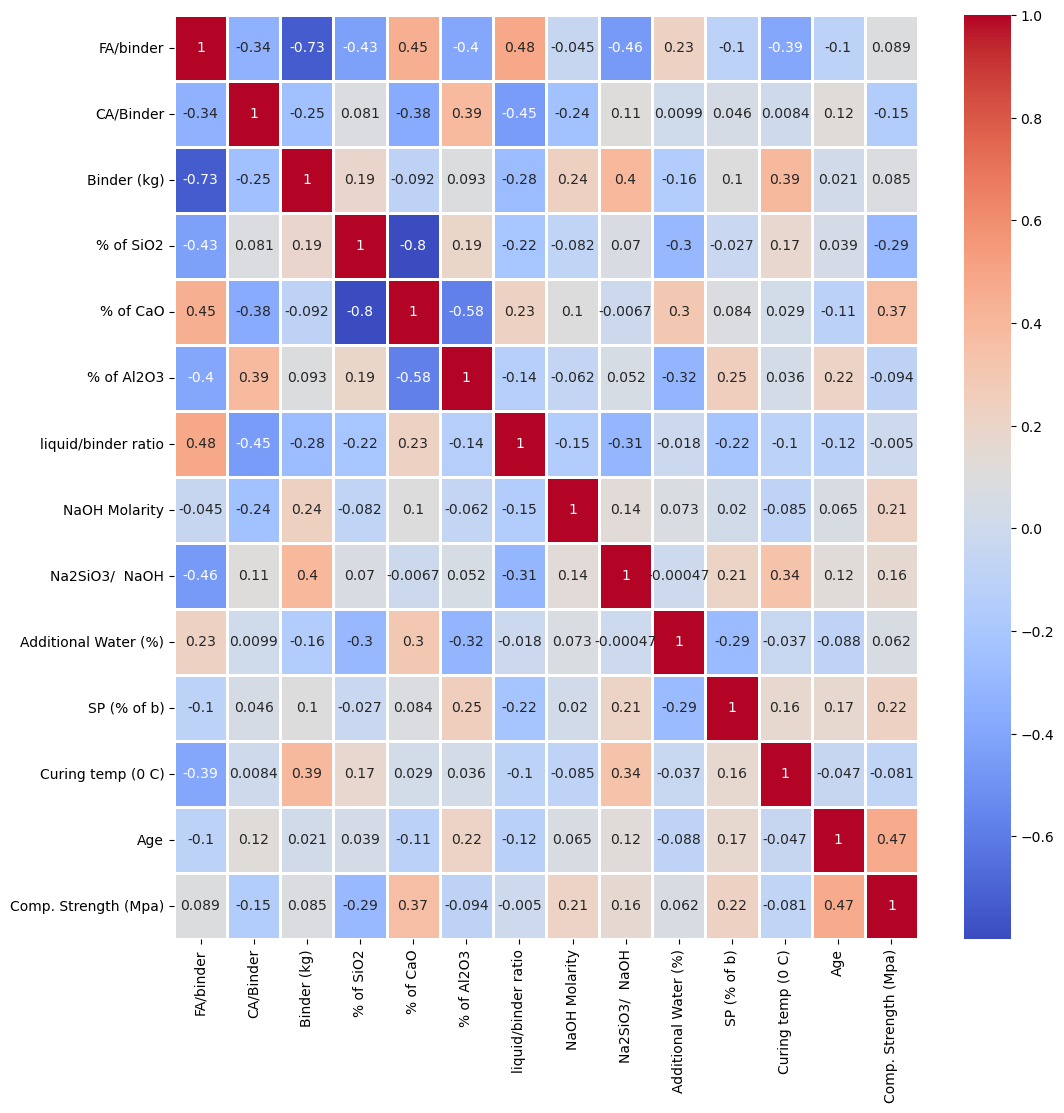

In [141]:
plt.figure(figsize=(12,12))
ax=sns.heatmap(df.corr(),cmap="coolwarm",annot=True,linewidths=2)

In [142]:
discrete_feature = [f for f in df.columns if df[f].nunique() < 15]
print("Discrete Features:", discrete_feature)
print("Count:", len(discrete_feature))

Discrete Features: ['Curing temp (0 C)', 'Age']
Count: 2


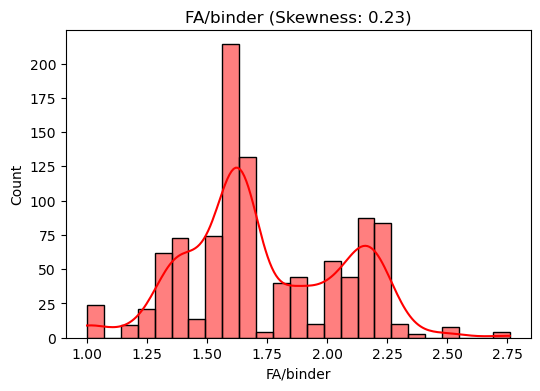

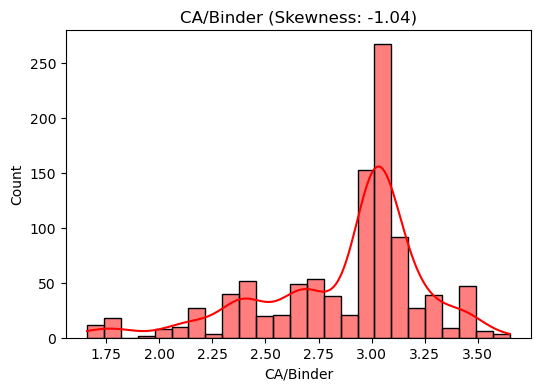

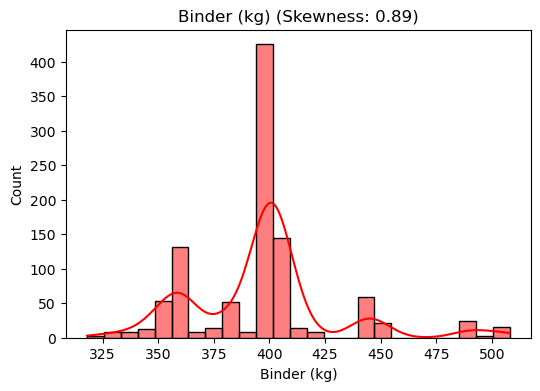

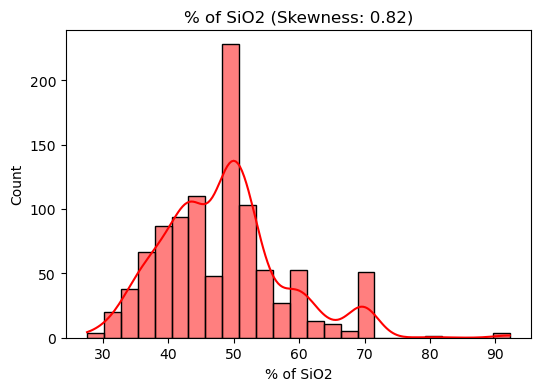

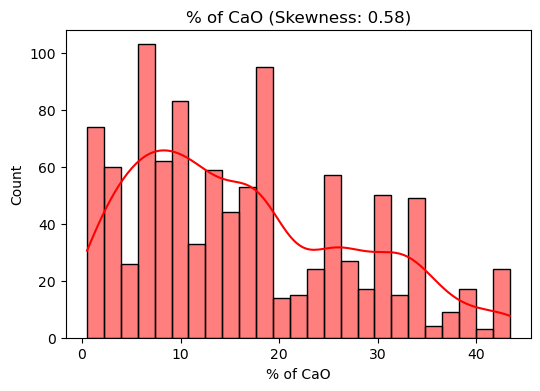

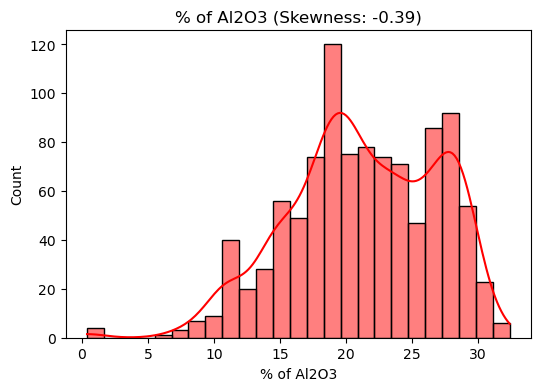

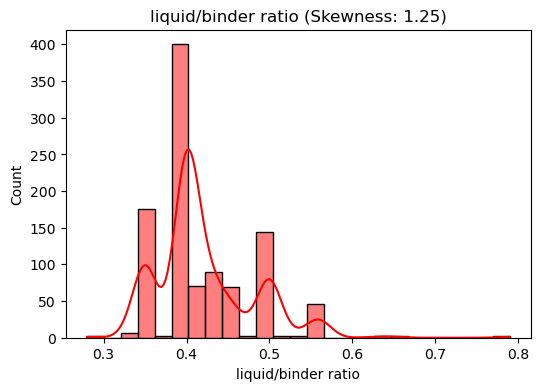

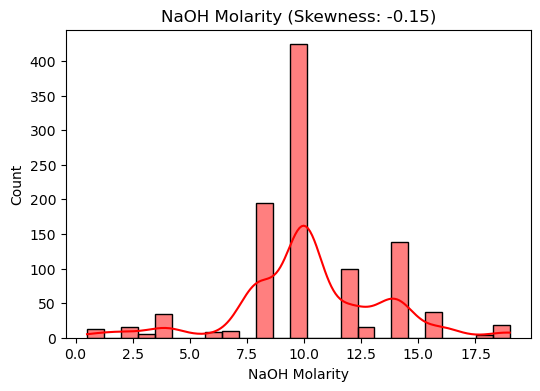

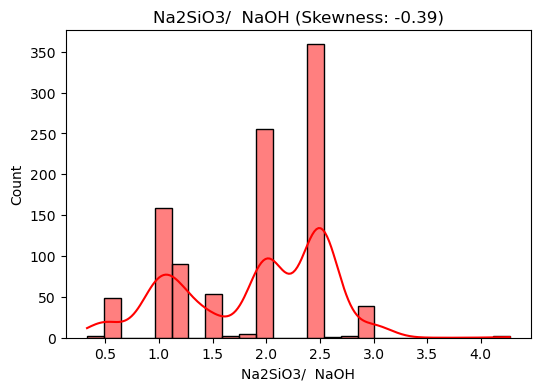

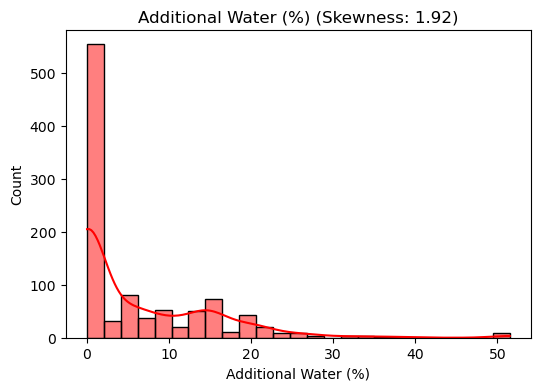

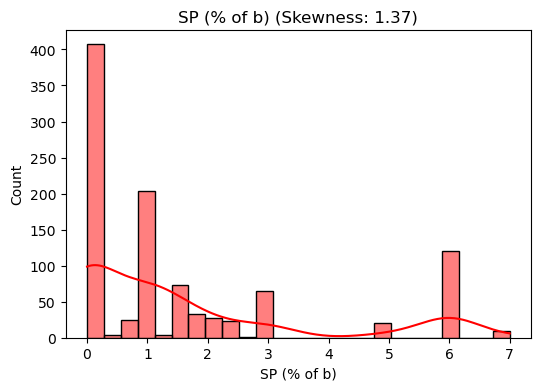

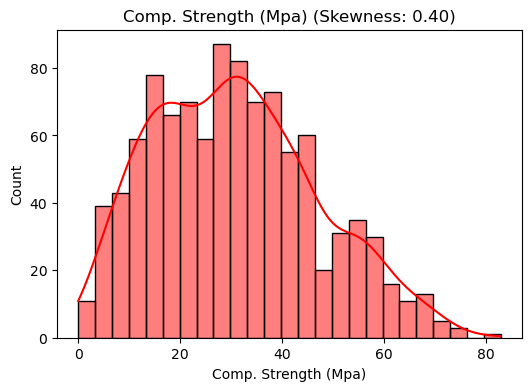

In [143]:
for feature in df.columns:
    if feature not in discrete_feature:
        plt.figure(figsize=(6,4))
        sns.histplot(df[feature], bins=25, kde=True, color='red')
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(f"{feature} (Skewness: {df[feature].skew():.2f})")
        plt.show()

In [144]:
skewed_features = [f for f in df.columns if df[f].skew() > 0.75 and f not in discrete_feature]
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])

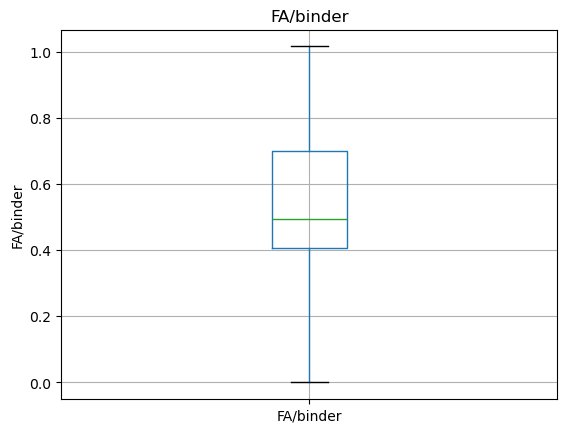

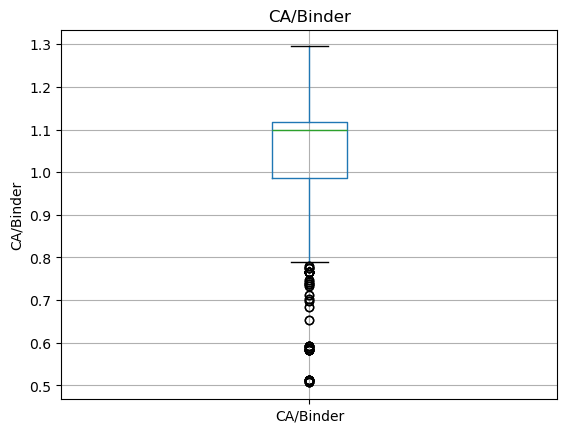

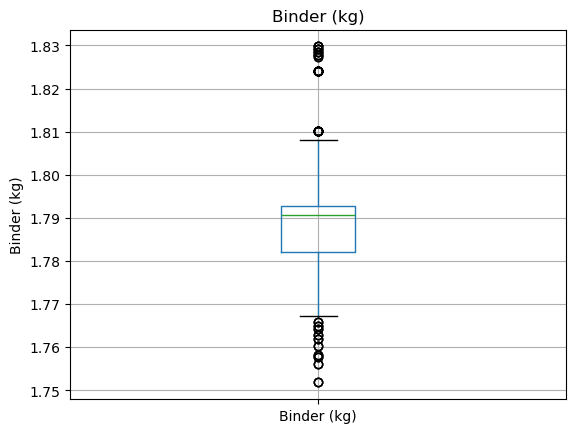

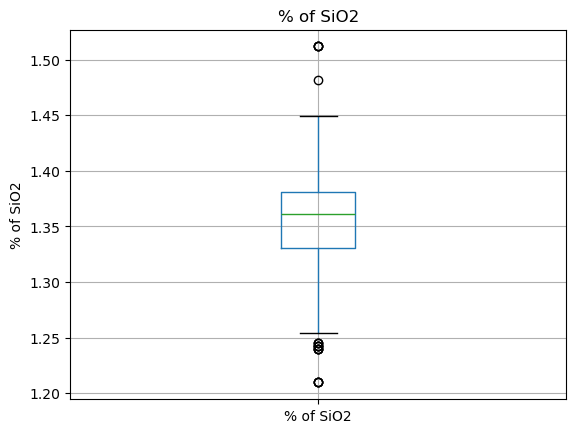

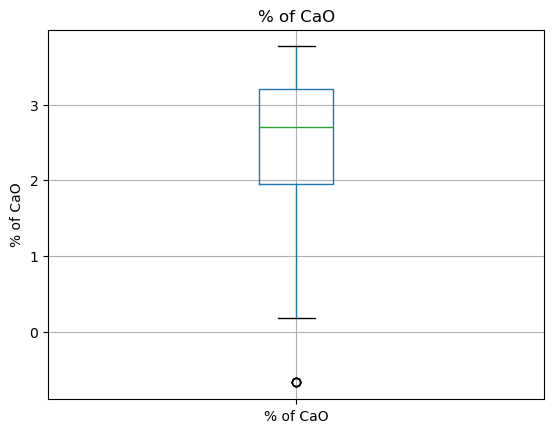

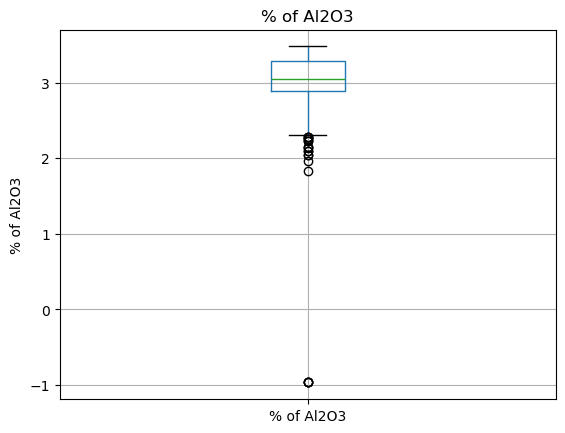

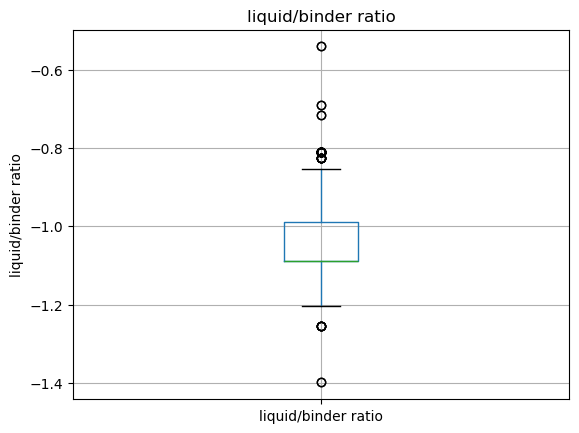

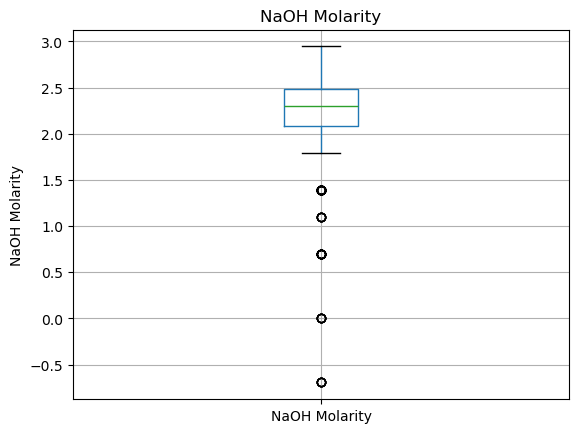

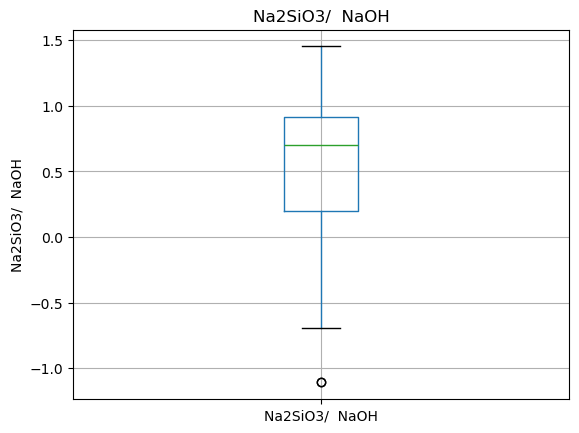

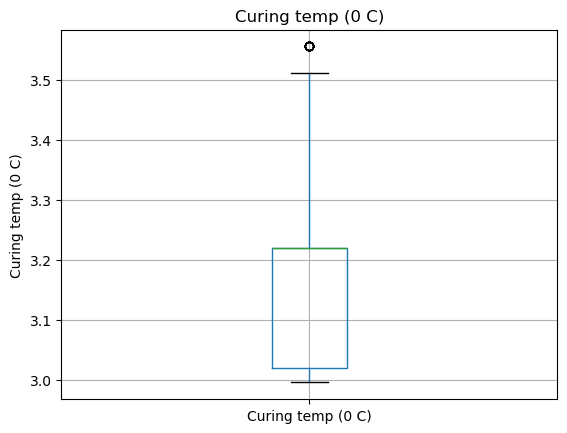

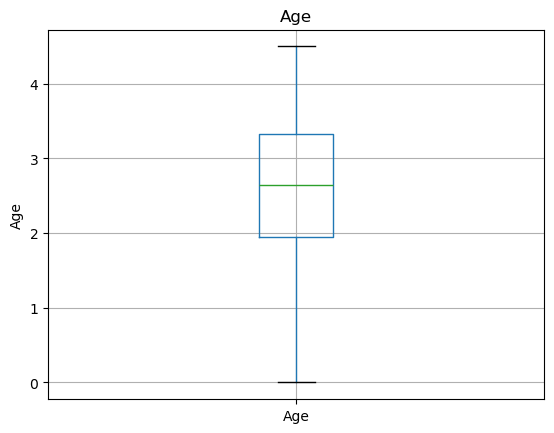

In [145]:
for feature in df.columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

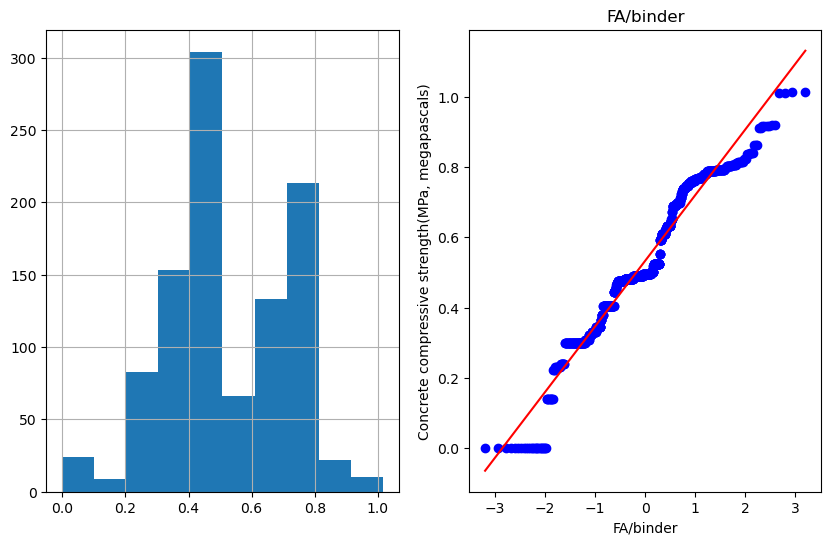

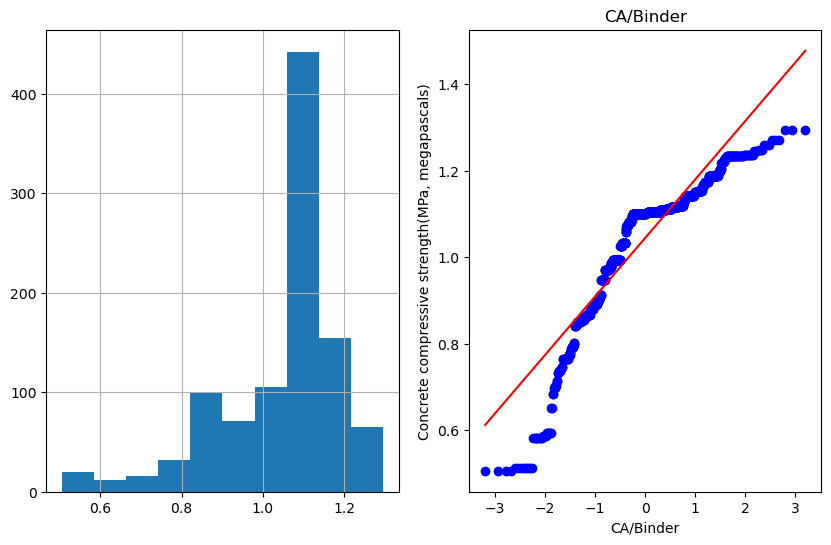

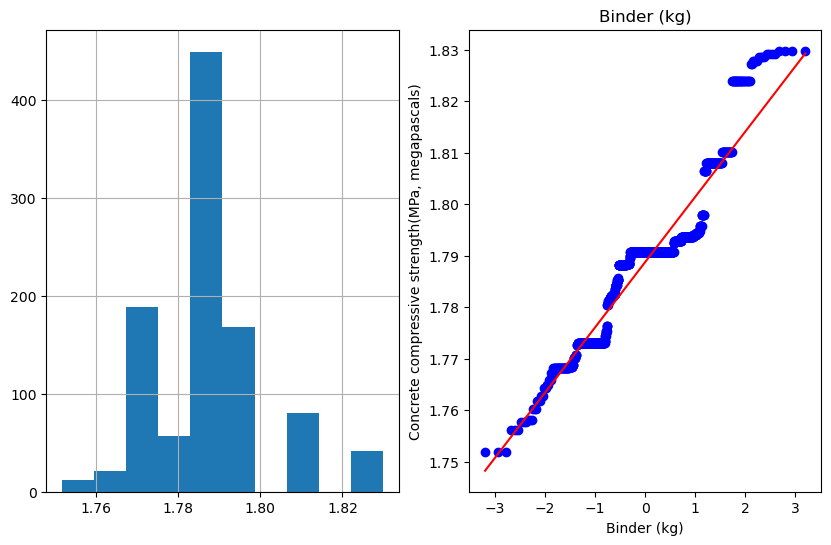

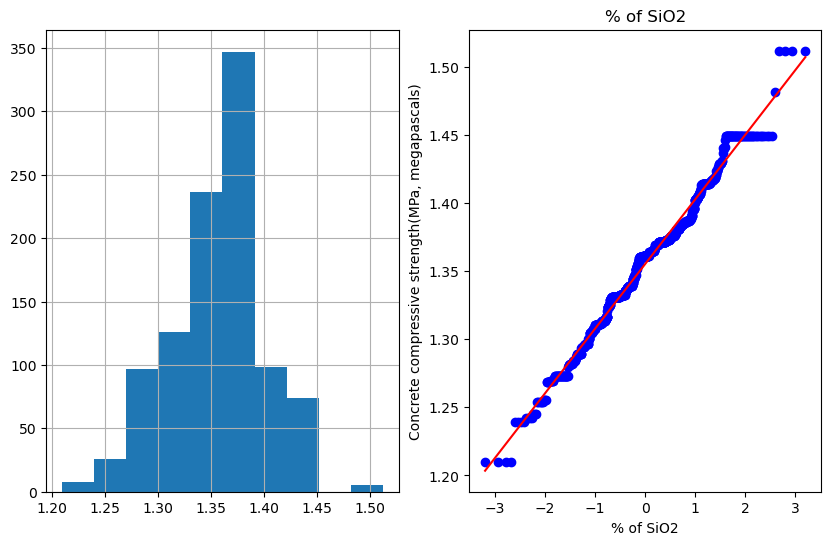

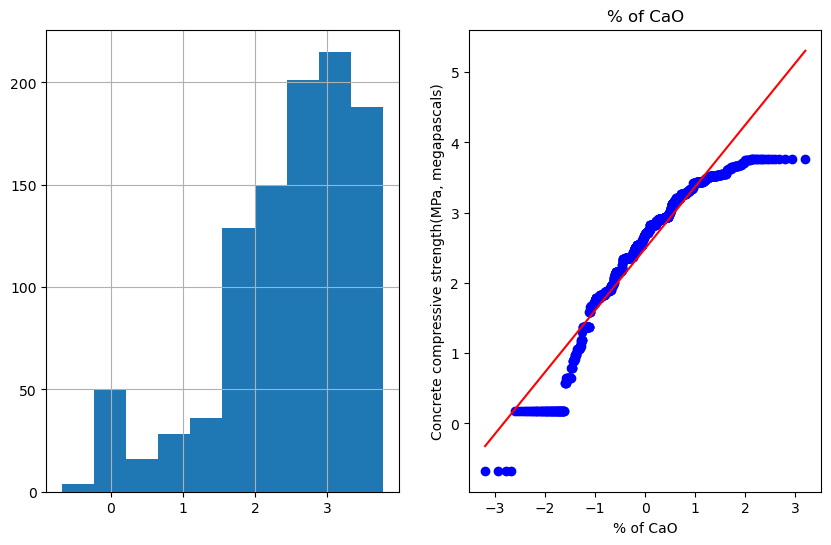

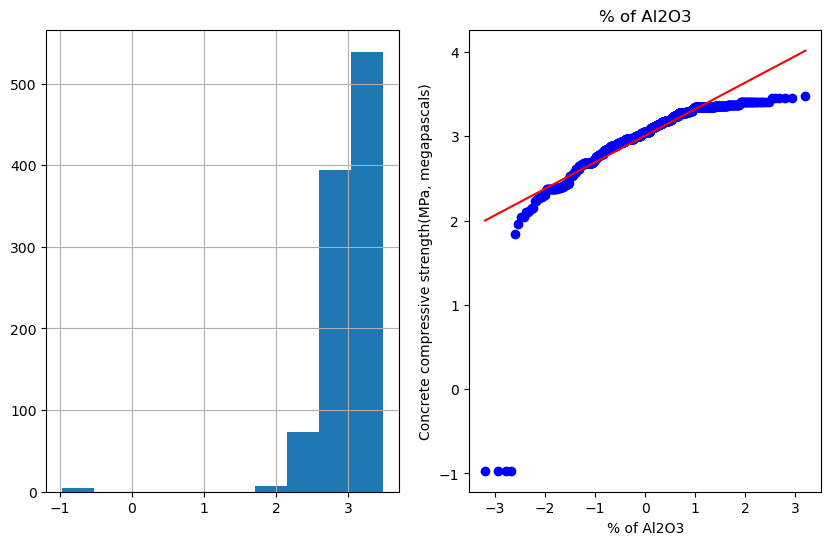

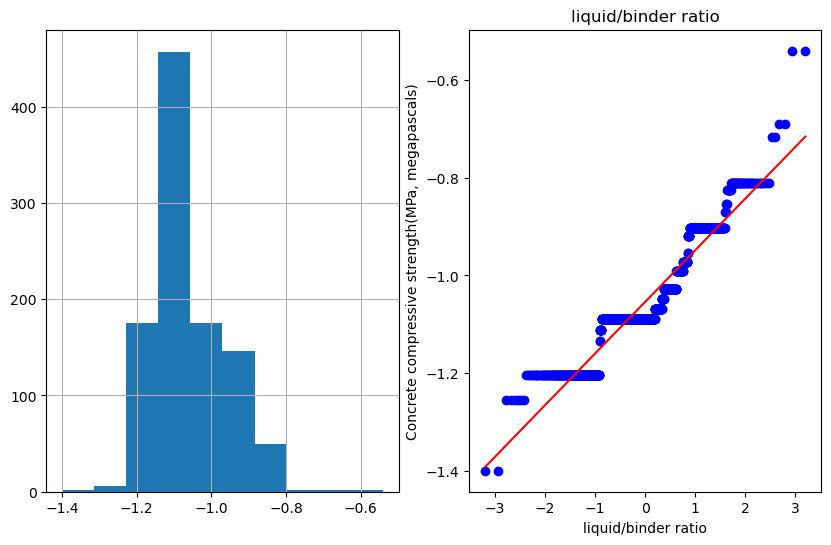

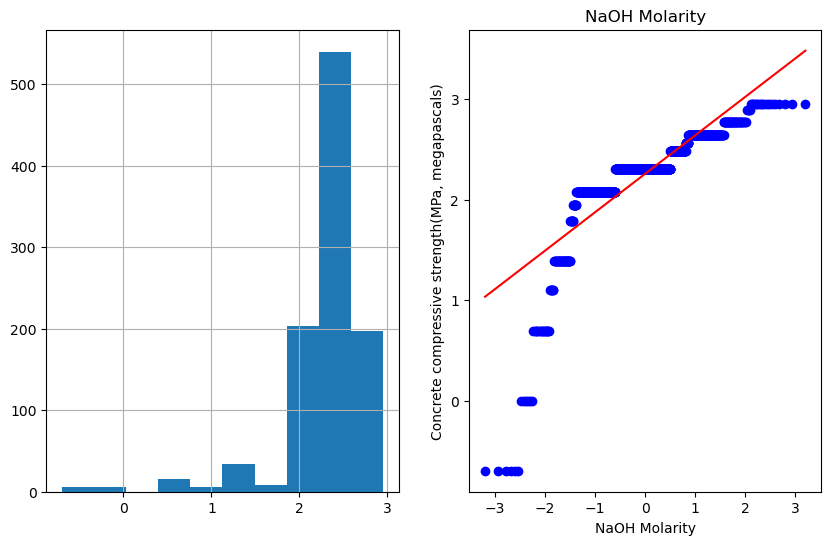

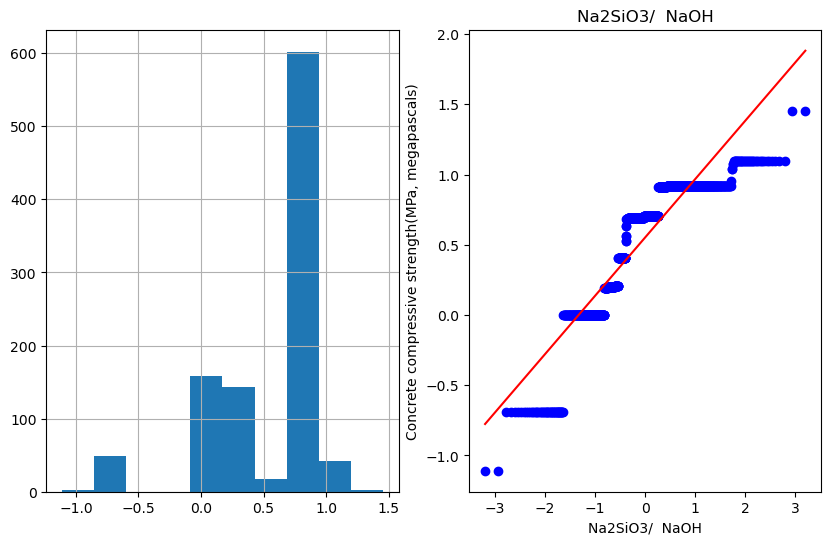

In [146]:
import scipy.stats as stat
import pylab 
for feature in df.columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    elif feature=='Age':
        pass
    elif feature=='Curing temp (0 C)':
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        data[feature].hist()
        plt.subplot(1,2,2)
        stat.probplot(data[feature],dist='norm',plot=pylab)
        plt.xlabel(feature)
        plt.ylabel('Concrete compressive strength(MPa, megapascals)')
        plt.title(feature)
        plt.show()

In [147]:
for feature in df.columns:
    if feature== 'FA/binder' :
        pass
    elif feature == '% of SiO2' :
        pass
    elif feature == '% of Al2O3' :
        pass
    elif feature == 'Additional Water (%)':
        pass
    elif feature == 'SP (% of b)' :
        pass
    elif feature ==  'Curing temp (0 C)':
        pass
    elif feature ==  'Age':
        pass
    else:
        df[feature]=np.log1p(df[feature])

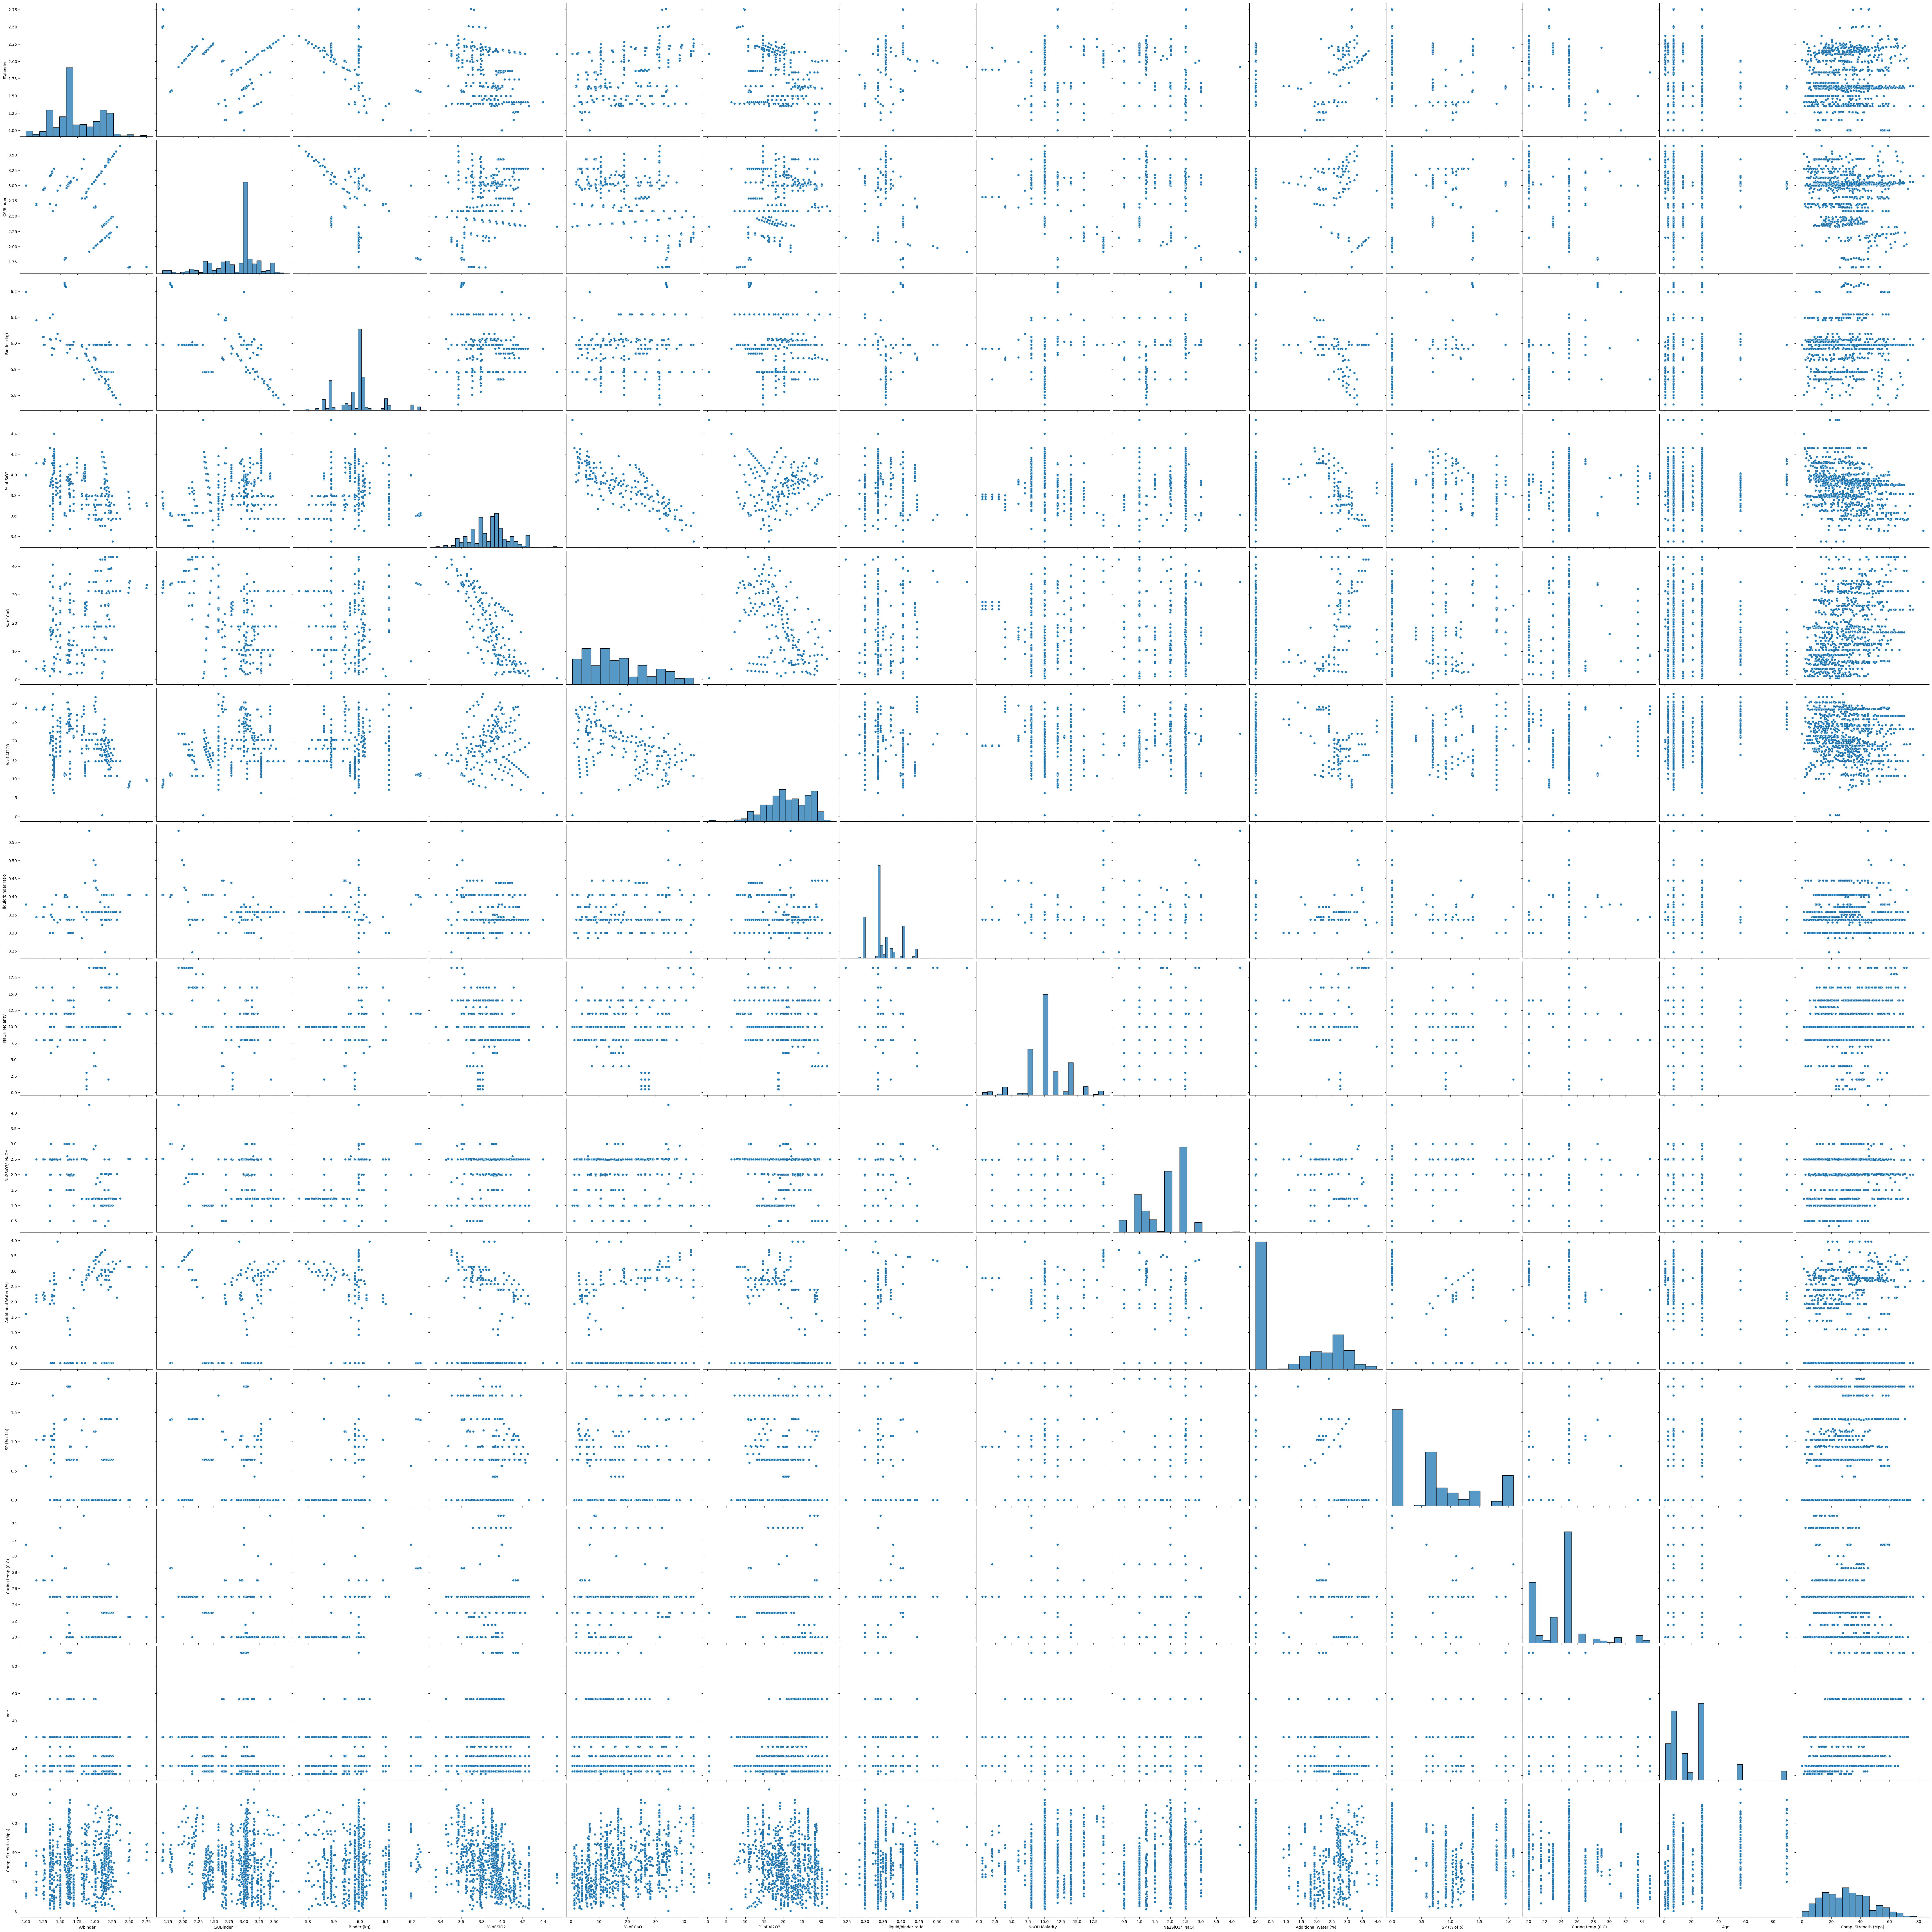

In [148]:
sns.pairplot(data ,  height=5, markers="o" ) 

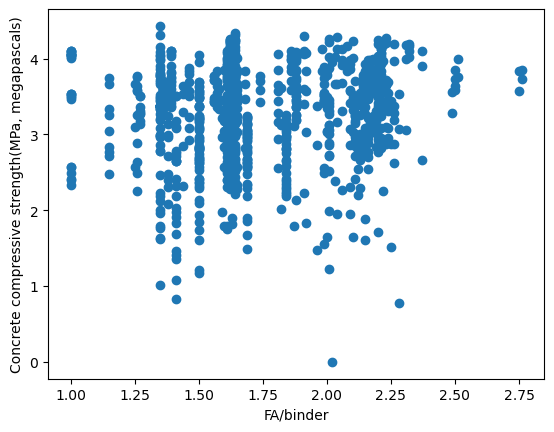

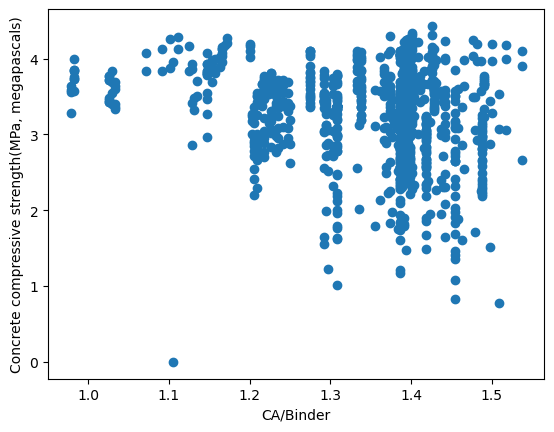

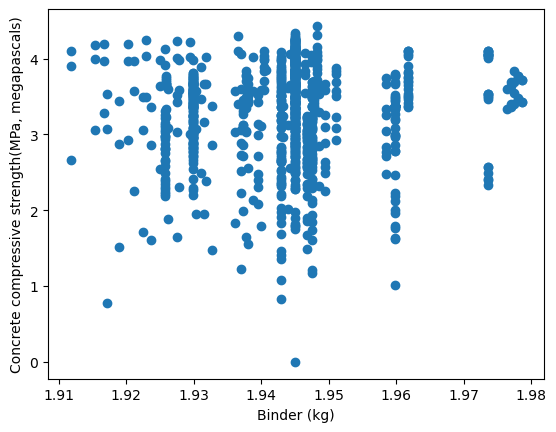

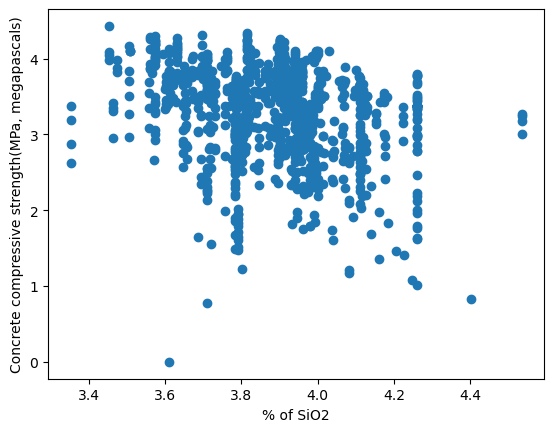

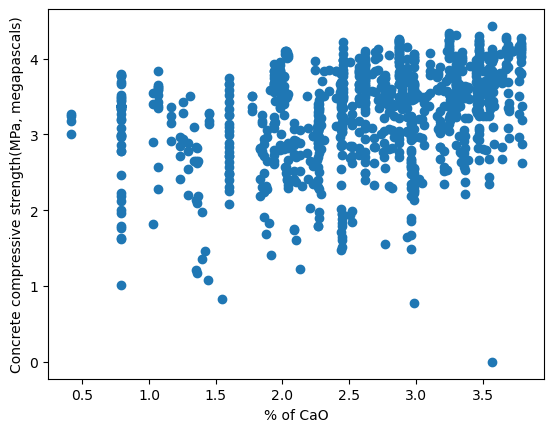

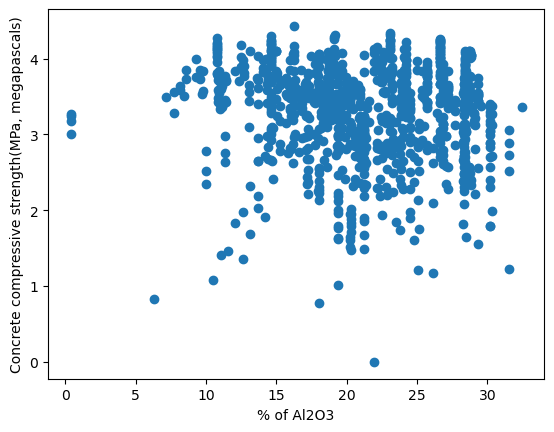

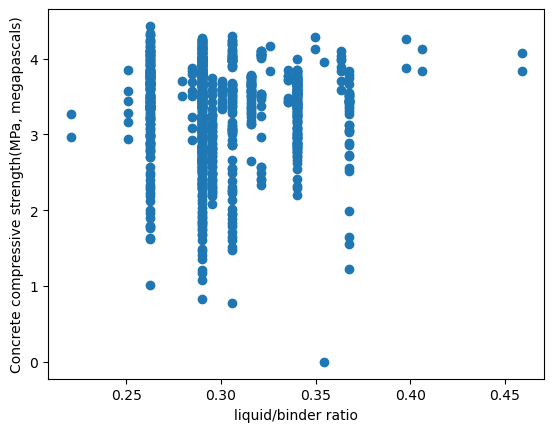

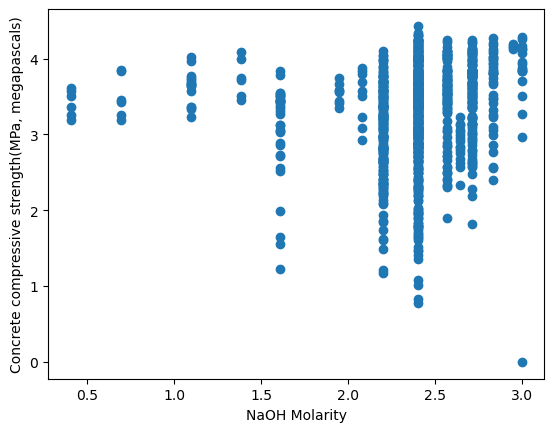

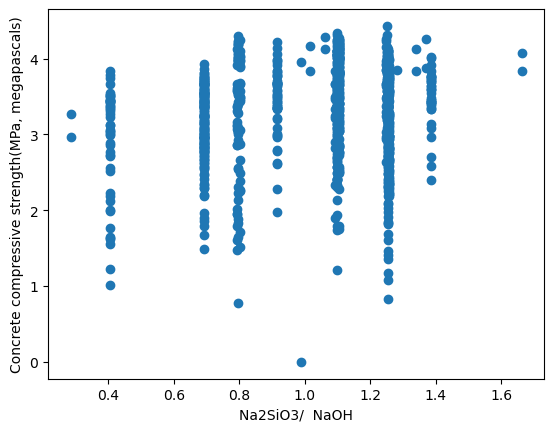

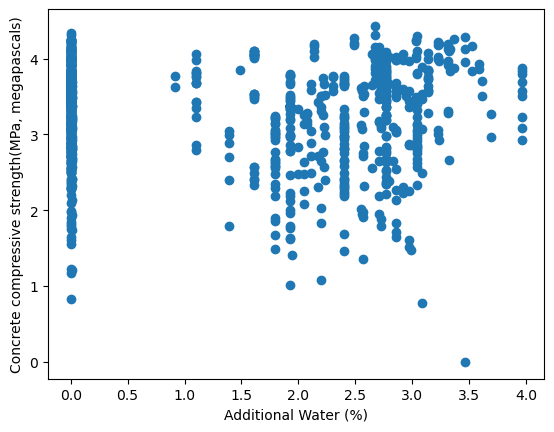

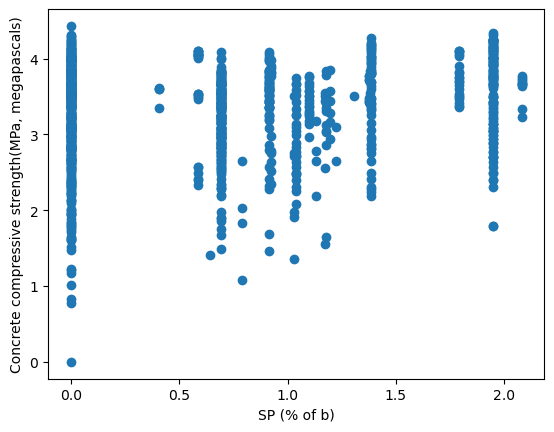

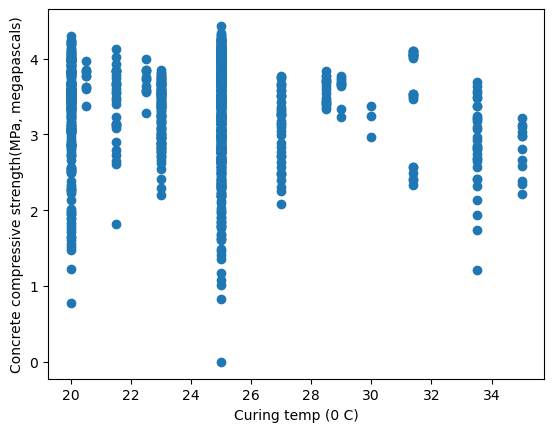

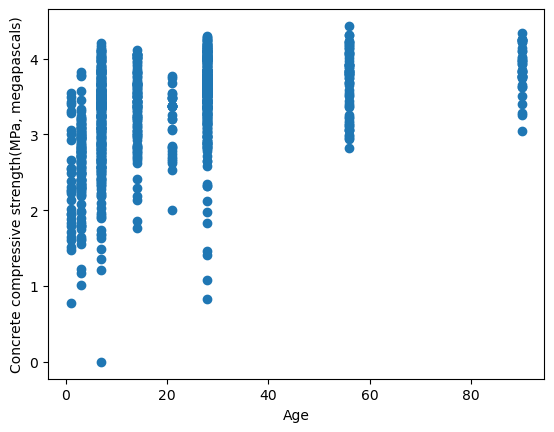

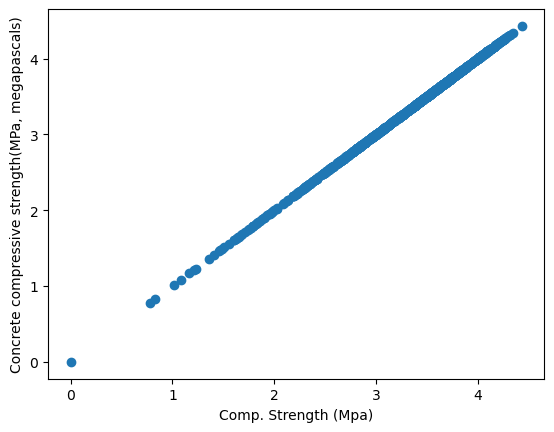

In [149]:
for feature in df.columns:

    plt.scatter(df[feature],df.iloc[:, -1 ])
    plt.xlabel(feature)
    plt.ylabel('Concrete compressive strength(MPa, megapascals)')
    plt.show()

In [150]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
higher_bound=Q3+1.5*IQR

outliers=(df<lower_bound) | (df>higher_bound)
rows_with_outliers = outliers.any(axis=1)

df = df[~rows_with_outliers]
print(df.shape)

(673, 14)


In [151]:
#df.columns.to_list()
features=['FA/binder','CA/Binder','Binder (kg)','% of SiO2','% of CaO','% of Al2O3','liquid/binder ratio','NaOH Molarity','Na2SiO3/  NaOH',
          'Additional Water (%)', 'SP (% of b)', 'Curing temp (0 C)', 'Age']
X=df[features]
y=df['Comp. Strength (Mpa)']
print(X.shape)
print(y.shape)

(673, 13)
(673,)


In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#X_train

In [153]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [154]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr=lr.predict(X_test_scaled)

In [155]:
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

In [156]:
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_cv.predict(X_test_scaled)

In [157]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)  # Use unscaled features
y_pred_rf = rf.predict(X_test)

In [158]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.3f}")
    print("-"*35)
    return rmse, r2

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression Performance:
  RMSE: 0.38
  R²: 0.467
-----------------------------------
Lasso Regression Performance:
  RMSE: 0.38
  R²: 0.461
-----------------------------------
Ridge Regression Performance:
  RMSE: 0.38
  R²: 0.466
-----------------------------------
Random Forest Regressor Performance:
  RMSE: 0.25
  R²: 0.772
-----------------------------------


(np.float64(0.24924261631233516), 0.7723680958314835)

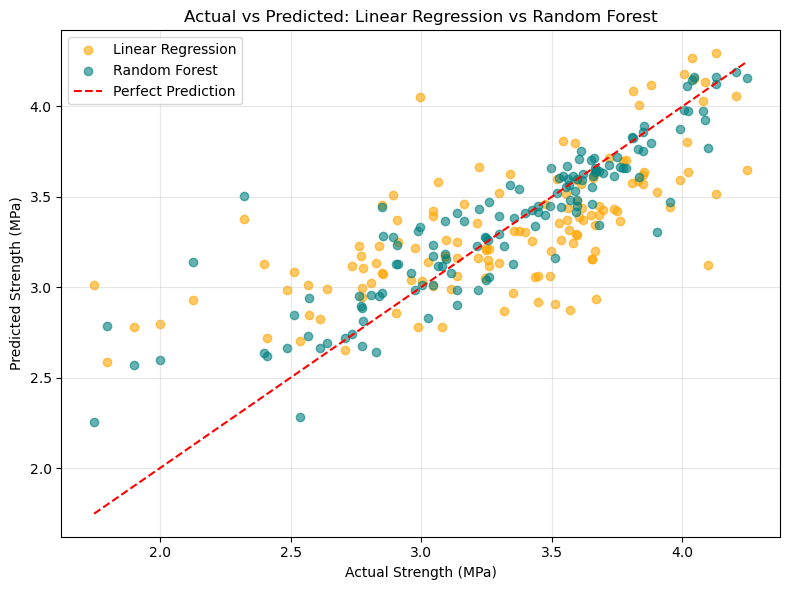

In [159]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred_lr, alpha=0.6, label="Linear Regression", color="orange")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest", color="teal")


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted: Linear Regression vs Random Forest")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()